# Kaggle

A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017). The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves. There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

## Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

## Domain: E-commerce

#### Dataset Description:
This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store.

#### Attribute Description
InvoiceNo Invoice number (A 6-digit integral number uniquely assigned to each transaction)
StockCode Product (item) code
Description Product (item) name
Quantity The quantities of each product (item) per transaction
InvoiceDate The day when each transaction was generated
UnitPrice Unit price (Product price per unit)
CustomerID Customer number (Unique ID assigned to each customer)
Country Country name (The name of the country where each customer resides)
Analysis tasks to be performed:
Use the clustering methodology to segment customers into groups:
Use the following clustering algorithms:

#### K means
Hierarchical
• Identify the right number of customer segments.
• Provide the number of customers who are highly valued.
• Identify the clustering algorithm that gives maximum accuracy and explains robust clusters.
• If the number of observations is loaded in one of the clusters, break down that cluster further using the clustering algorithm. [ hint: Here loaded means if any cluster has more number of data points as compared to other clusters then split that clusters by increasing the number of clusters and observe, compare the results with previous results.]

# Planning IOT (input | output | tasks)

1. Input 

    - Select the MOST VALUABLE CLIENTS to engage in a fidellity program called "insiders", using sells data from November/2015 to December/2017

2. Output

    - Point out the customers who are most likelly to be a part of the program "INSIDERS"
    - Report the answers to the following questions:
        -- Who is ellegible for the program?
        
        -- How many clients are going to be a part of the program?
        
        -- Which are the main characteristics of these clients?
        
        -- What is the percentage of revenue coming from this group contribution?
        
        -- What is the expectation of revenue coming from this group for the next few months?
        
        -- Which are the conditions for a person to be elegible to this program?
        
        -- Which are the conditions for a person to be removed from this program?
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
        -- Which actions can the marketing team take to increase revenue?
        
3. Tasks

    - Sugesting solutions:
    
        -- Who is ellegible? What defines elligibility? Who is a valuable customer to the company?
        
            * Revenue:
                ** High LTV value
                ** High frequency
                ** Large basket size
                ** Low churn probability
                ** High LTV previsibility
                
            * Cost:
                ** Low devolution number
                
            * Experience:
                ** Good feedback 
        -- How many clients are going to be a part of the program?
        
            * Number of clients
            * % to the total number of clients
        
        -- Which are the main characteristics of these clients?
        
            * Main attributes of clients:
                ** Age
                ** Country
                ** Salary
            
            * Main shopping behaviours
        
        -- What is the percentage of revenue coming from this group contribution?
            
            * Calculate company´s total revenue
            * Calculate INSIDERS cluster revenue
        
        -- What is the expectation of revenue coming from this group for the next few months?
            
            * Calculate LTV of INSIDERS cluster
            * Time series (ARMA, ARIMA, HoltWinter, etc)
        
        -- Which are the conditions for a person to be elegible to this program?
            
            * When is the evaluation taking place?
            * Is the client´s behaviour close to the INSIDERS cluster?
        
        -- Which are the conditions for a person to be removed from this program?
        
            * CLient´s behaviour is not close to the average of INSIDERS cluster
        
        -- What is the guarantee that the "INSIDERS" program is better than the rest of the customers?
        
            * Hypothesis test
            * A/B test
        
        -- Which actions can the marketing team take to increase revenue?
        
            * Discounts
            * Exclusive products
        



# 0. Imports

## Libraries

In [103]:
# Jupyter settings
from IPython.core.display      import display, HTML
from IPython.display           import Image

# data manipulation
import inflection
import datetime
import math
import random
import numpy as np
import pandas as pd
from scipy import stats as ss

# EDA
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import express as px

# sklearn
from sklearn import cluster as c
from sklearn import metrics as m

# metrics
import yellowbrick

## Functions

In [104]:
# jupyter setup
def jupyter_settings():
    
    # jupyter core settings
    display(HTML("<style>.container { width:100% !important; }</style>"))
    
    # pandas
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.expand_frame_repr', False)
    
    # matplotlib
    !pylab inline
    !matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [35, 12]
    plt.rcParams['font.size'] = 30
    
    # seaborn
    sns.set()
    
    # yellowbrick
    yellowbrick.style.rcmod.set_aesthetic()

    
# descriptive analysis summary for numerical features
def num_analysis(num_attributes):
    
    # Cemtral tendency - mean, median
    ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
    ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(num_attributes.apply(np.std)).T
    d2 = pd.DataFrame(num_attributes.apply(min)).T
    d3 = pd.DataFrame(num_attributes.apply(max)).T
    d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

    # concatenate
    m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
    m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis',]
    
    # histogram
    hist = num_attributes.hist(bins=30)
    
    return m

    return hist

In [105]:
jupyter_settings()

/bin/bash: pylab: command not found
/bin/bash: matplotlib: command not found


## Data

In [4]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding="iso8859-1")

In [5]:
df_raw = df_raw.drop(columns=["Unnamed: 8"])

# 1. Descriptive Analysis 

In [6]:
df1 = df_raw.copy()

## 1.1. Rows and Columns

In [7]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  541909
Number of columns:  8


In [8]:
# rename columns
snakecase = lambda x: inflection.underscore(x)
df1.columns = list(map(snakecase, df1.columns))

## 1.2. Data Types

In [9]:
pd.DataFrame(df1.dtypes).T

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,object,object,object,int64,object,float64,float64,object


In [10]:
df1.describe()

,quantity,unit_price,customer_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 1.3. Check NA

In [11]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### Fill NA

In [12]:
df1 = df1.dropna(subset=['description', 'customer_id'])
print(df1.shape[0])
print(df_raw.shape[0])
print('Data kept: {:.2f}%'.format((df1.shape[0]/df_raw.shape[0])))
print('Removed data: {:.2f}%'.format(1-(df1.shape[0]/df_raw.shape[0])))

406829
541909
Data kept: 0.75%
Removed data: 0.25%


## 1.4. Change dtypes

In [13]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [14]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.5. Descriptive Statistics

In [15]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])
time_attributes = df1.select_dtypes(include=['datetime64[ns]'])

### Numerical Attributes

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


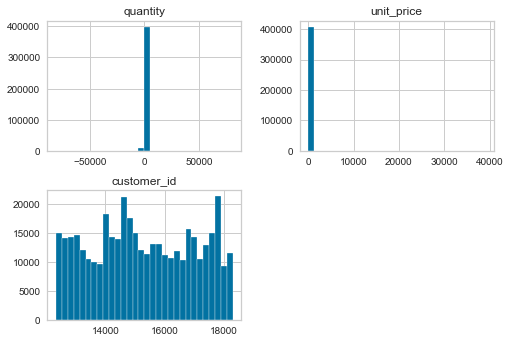

In [16]:
num_analysis(num_attributes)

### Categorical Attributes

In [18]:
cat_attributes.apply(lambda x: x.unique().shape)

,invoice_no,stock_code,description,country
0,22190,3684,3896,37


<AxesSubplot:xlabel='country', ylabel='count'>

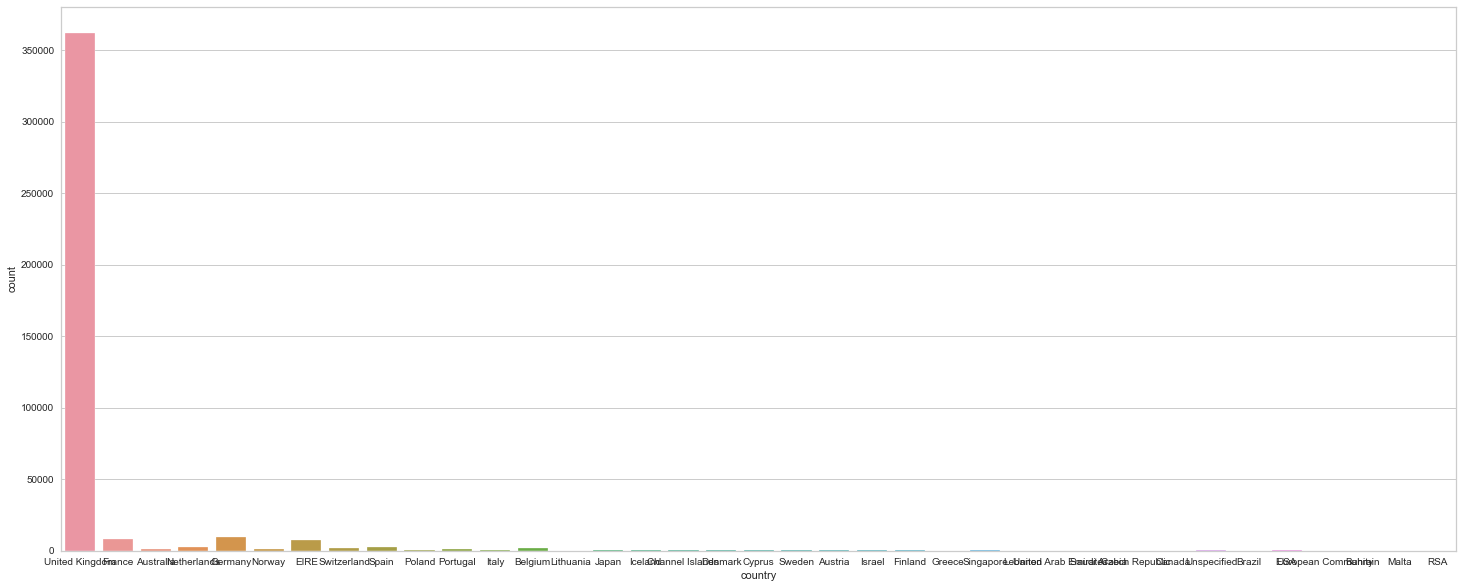

In [20]:
plt.figure(figsize=[25,10])
sns.countplot(x='country',data=df1)

# 2. Feature Engineering

In [21]:
df2 = df1.copy()
df2.to_csv('../data/interim/df2.csv')
df2

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2017-12-07,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2017-12-07,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2017-12-07,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2017-12-07,4.15,12680,France


In [22]:
# data reference
df_ref = pd.DataFrame(df2['customer_id'].unique(), columns=['customer_id'])

# gross revenue
df2['gross_revenue'] = df2['quantity']*df2['unit_price']

# monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# recency
df_recency = df2[['customer_id', 'invoice_date']].groupby('invoice_date').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id')

# frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref

,customer_id,gross_revenue,recency_days,invoice_no
0,18144,2.888750e+03,156,12
1,17841,4.034078e+04,324,169
2,17841,4.034078e+04,313,169
3,17841,4.034078e+04,299,169
4,17841,4.034078e+04,137,169
5,17841,4.034078e+04,131,169
6,18229,7.276900e+03,373,20
7,18229,7.276900e+03,329,20
8,18229,7.276900e+03,294,20
9,18229,7.276900e+03,264,20


# 3. Filter

In [23]:
df3 = df_ref.copy()

# 4. EDA (Exploratory Data Analysis)

In [24]:
df4 = df3.copy()

# 5. Data Preparation 

In [25]:
df5 = df4.copy()

# 6. Feature Selection

In [26]:
df6 = df5.copy()

# 7. Hyper Parameter Fine Tuning

In [27]:
X = df6.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_no
0,2888.75,156,12
1,40340.78,324,169
2,40340.78,313,169
3,40340.78,299,169
4,40340.78,137,169


In [28]:
clusters = [2,3,4,5,6]

In [29]:
from yellowbrick.cluster import KElbowVisualizer

8664401527.720877
5482845073.811467
306552266.50104123
142150014.73686916
127079687.86988951


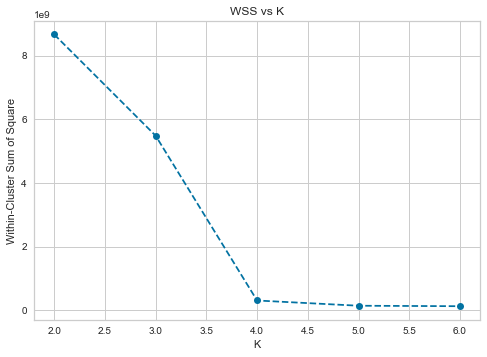

In [106]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model fit
    kmeans.fit(X)
    
    # inertia
    wss.append(kmeans.inertia_)
    print(kmeans.inertia_)
    
# plot wss - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vs K');

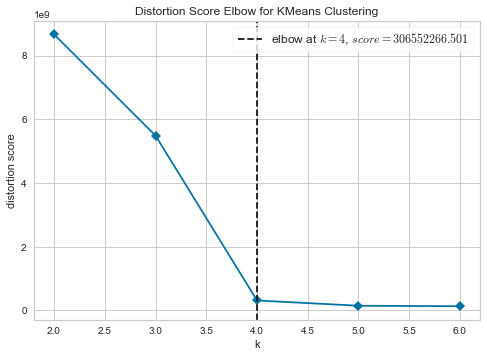

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
kmeans = KElbowVisualizer(c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

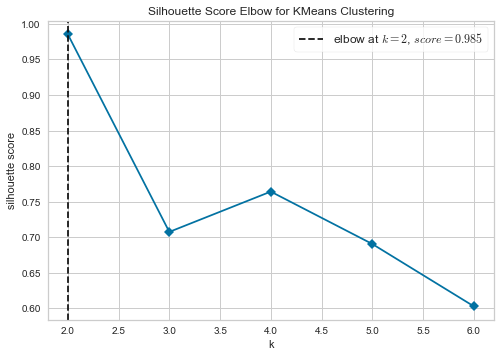

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [109]:
kmeans = KElbowVisualizer( c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

# 8.0. Model training

## 8.1. K-Means

In [52]:
# model definition
k = 4
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300)

# model fit
kmeans.fit(X)

# clustering
labels = kmeans.labels_

In [53]:
labels

array([0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 8.2. Cluster Validation

In [54]:
print('WSS value: {}'.format(kmeans.inertia_))

WSS value: 306552266.50104123


In [55]:
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

SS value: 0.7642170809090469


# 9. Cluster Analysis

In [97]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,18144,2888.75,156,12,0
1,17841,40340.78,324,169,1
2,17841,40340.78,313,169,1
3,17841,40340.78,299,169,1
4,17841,40340.78,137,169,1


# 9.1. Visualization Inspection

In [60]:
fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
fig.show()

## 9.2. Cluster Profile

### Number of Customers for Cluster and Percentage by Cluster

In [86]:
df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()

,cluster,customer_id
0,0,225
1,1,5
2,2,5
3,3,70


In [98]:
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(np.round(df_cluster['customer_id'] / df_cluster['customer_id'].sum(), decimals=5))
df_cluster

,cluster,customer_id,perc_customer
0,0,225,73.770
1,1,5,1.639
2,2,5,1.639
3,3,70,22.951


### Average Gross Revenue

In [99]:
df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()

,cluster,gross_revenue
0,0,1392.7752
1,1,40340.7800
2,2,256438.4900
3,3,6419.8200


In [100]:
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_gross_revenue, decimals=3), how='inner', on='cluster')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue
0,0,225,73.770,1392.775
1,1,5,1.639,40340.780
2,2,5,1.639,256438.490
3,3,70,22.951,6419.820


### Average Recency Days

In [101]:
df_avg_recency_revenue = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_recency_revenue, decimals=3), how='inner', on='cluster')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days
0,0,225,73.770,1392.775,178.929
1,1,5,1.639,40340.780,240.800
2,2,5,1.639,256438.490,121.200
3,3,70,22.951,6419.820,188.371


### Average Invoice N°

In [102]:
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, np.round(df_avg_invoice_no, decimals=3), how='inner', on='cluster')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no
0,0,225,73.770,1392.775,178.929,7.062
1,1,5,1.639,40340.780,240.800,169.000
2,2,5,1.639,256438.490,121.200,62.000
3,3,70,22.951,6419.820,188.371,21.871


### Cluster 02 (Candidate to INSIDERS classification)

    -- Only 1.64% of costumers.
    -- Recency = 121 days average
    -- Average invoices: 62
    -- Gross Revenue: $ 256438.490	